In [318]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

import numpy as np

In [361]:
data,labels = make_blobs(n_samples=10000,n_features=2,cluster_std=1)

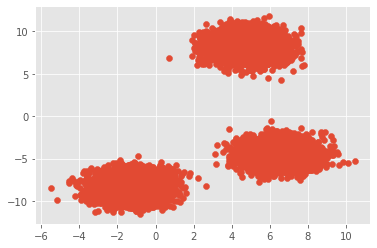

In [362]:
plt.scatter(data[:,0],data[:,1]);

In [372]:
k = 3
tol = 0.000000001
max_iter = 300

In [373]:
centroids = {}

## inicializando os centroids com os 3 primeiros valores de data
for i in range(k):
    centroids[i] = data[i]

{0: array([-1.29079479, -8.28838212]), 1: array([5.10864983, 5.8794518 ]), 2: array([ 6.56477209, -4.97280327])}
4.513734039181113
{0: array([-1.29079479, -8.28838212]), 1: array([4.78343234, 8.22357811]), 2: array([ 6.51864127, -4.54932779])}
33.503794471193075
Optmized


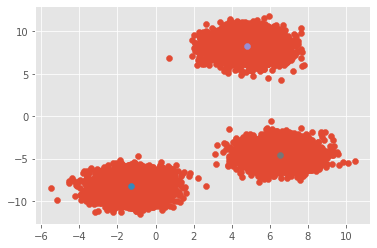

In [374]:
for i in range(max_iter):
    
    classification = {}
    
    for i in range(k):
        classification[i] = []
        
    for point in data:
        distance = [math.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2) for centroid in centroids.values()]
        point_label = np.argmin(distance)
        classification[point_label].append(point)
        
    prev_centroids = dict(centroids)
    
    for label in classification:
        centroids[label] = np.average(classification[label],axis=0)
        
    
    optmized = True
    
    for label in centroids:
        
        original_centroid = prev_centroids[label]
        
        current_centroid = centroids[label]
        
        
        if np.sum((current_centroid - original_centroid)/ original_centroid *100.0) > tol:
            
            print(centroids)
            print(np.sum((current_centroid - original_centroid)/ original_centroid *100.0))
            
            
            optmized = False
    
    if optmized:
        print('Optmized')
        
        plt.scatter(data[:,0],data[:,1])
        for label in centroids.values():
            plt.scatter(x=label[0],y=label[1])
        
        break    